In [157]:
import csv
import pandas as pd
contents = []

with open('Curse-detection-data/dataset.txt', 'r',encoding='UTF8') as f:
    reader = csv.reader(f, delimiter = '\t')
    for row in f:
        contents.append(row.split('|'))

In [158]:
df = pd.DataFrame(contents, columns=['document','label','none'])
df

,document,label,none
0,좌배 까는건 ㅇㅂ,1\n,None
1,집에 롱 패딩만 세 개다. 10년 더 입어야지 ㅋㅋ,0\n,None
2,개소리야 니가 빨갱이를 옹호하고 드루킹을 ㅇㅇ짓이라고 말못해서 삐진거야 빨갱아,1\n,None
3,세탁이라고 봐도 된다,0\n,None
4,애새끼가 초딩도 아니고 ㅋㅋㅋㅋ,1\n,None
...,...,...,...
5820,좌우 헬파이어 3개씩 6개 장착에 아파치보다 약하지만 20mm 기관포 장착임,0\n,None
5821,"세금 내놓으라고 데모질 중 ㅋㅋ간첩, 도둑놈 새끼들이 대통령 해처먹으니까 나도 같...",1\n,None
5822,너가 한 말 중에,0\n,None
5823,제갈대중 ㅇㅂ,0\n,None


In [189]:
# 단어수가 1개 이하인 악플 리뷰 삭제
none_meaning_index = df[df.document.apply(lambda x:len(x)<2)].index
df.drop(none_meaning_index, inplace=True)
df.reset_index(drop=True, inplace=True)
df

,document,label
0,좌배 까는건 ㅇㅂ,1
1,집에 롱 패딩만 세 개다. 10년 더 입어야지 ㅋㅋ,0
2,개소리야 니가 빨갱이를 옹호하고 드루킹을 ㅇㅇ짓이라고 말못해서 삐진거야 빨갱아,1
3,세탁이라고 봐도 된다,0
4,애새끼가 초딩도 아니고 ㅋㅋㅋㅋ,1
...,...,...
5804,좌우 헬파이어 3개씩 6개 장착에 아파치보다 약하지만 20mm 기관포 장착임,0
5805,"세금 내놓으라고 데모질 중 ㅋㅋ간첩, 도둑놈 새끼들이 대통령 해처먹으니까 나도 같...",1
5806,너가 한 말 중에,0
5807,제갈대중 ㅇㅂ,0


# label 값 \n 처리 , none 열 삭제

In [190]:
df[df['label'].apply(lambda x: '한경' in x)]
df.drop(455, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df['label'] = df['label'].apply(lambda x : int(x.replace("\n","")))
df.drop('none',axis=1,inplace=True)
df['label'].value_counts()

TypeError: argument of type 'int' is not iterable

False
훈련용 리뷰의 개수 : 4356
테스트용 리뷰의 개수 : 1453


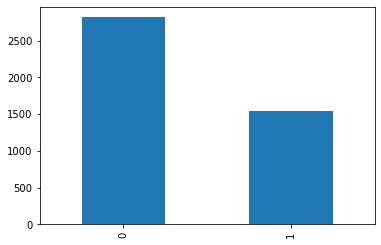

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

df['document'].nunique(),df['label'].nunique() 
print(df.isnull().values.any())

train_data, test_data = train_test_split(df, test_size = 0.25, random_state = 42)
print('훈련용 리뷰의 개수 :', len(train_data))
print('테스트용 리뷰의 개수 :', len(test_data))

train_data['label'].value_counts().plot(kind = 'bar')

In [192]:
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게', '만', '게임', '겜', '되', '음', '면']

In [193]:
mecab = Mecab(dicpath=r"C:\mecab\mecab-ko-dic")


train_data['tokenized'] = train_data['document'].apply(mecab.morphs)
train_data['tokenized'] = train_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])
test_data['tokenized'] = test_data['document'].apply(mecab.morphs)
test_data['tokenized'] = test_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

<ipython-input-193-ff1de90eb13d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['tokenized'] = train_data['document'].apply(mecab.morphs)
<ipython-input-193-ff1de90eb13d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['tokenized'] = train_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])
<ipython-input-193-ff1de90eb13d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

# 단어와 길이 분포 확인

In [194]:
train_data.isna().sum()

document     0
label        0
tokenized    0
dtype: int64

In [195]:
positive_words = np.hstack(train_data[train_data.label == 0]['tokenized'].values)
negative_words = np.hstack(train_data[train_data.label == 1]['tokenized'].values)

In [196]:
negative_word_count = Counter(negative_words)
print(negative_word_count.most_common(20))

[('ㅋㅋㅋ', 825), ('.', 640), ('거', 351), ('?', 350), ('ㅋㅋ', 327), ('새끼', 260), ('있', 246), ('안', 192), ('아', 185), ('보', 176), ('나', 174), ('냐', 170), ('없', 148), ('니', 147), ('어', 145), ('로', 141), ('같', 140), ('일', 139), ('는데', 138), ('존나', 138)]


In [197]:
positive_word_count = Counter(positive_words)
print(positive_word_count.most_common(20))

[('.', 1037), ('?', 587), ('ㅋㅋㅋ', 391), ('있', 345), ('거', 332), ('ㅋㅋ', 272), ('냐', 243), ('안', 228), ('없', 228), ('는데', 208), ('나', 207), (',', 196), ('말', 171), ('에서', 169), ('으로', 165), ('아', 164), ('ㄷ', 156), ('아니', 150), ('어', 145), ('보', 144)]


부정 리뷰의 평균 길이 : 18.231319038336583
긍정 리뷰의 평균 길이 : 11.133120340788073


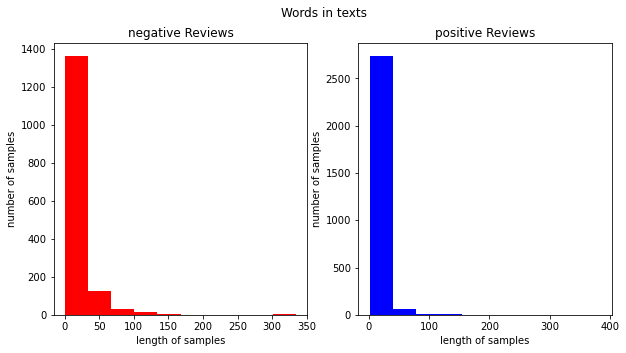

In [198]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
text_len = train_data[train_data['label']==1]['tokenized'].map(lambda x: len(x))
ax1.hist(text_len, color='red')
ax1.set_title('negative Reviews')
ax1.set_xlabel('length of samples')
ax1.set_ylabel('number of samples')
print('부정 리뷰의 평균 길이 :', np.mean(text_len))

text_len = train_data[train_data['label']==0]['tokenized'].map(lambda x: len(x))
ax2.hist(text_len, color='blue')
ax2.set_title('positive Reviews')
fig.suptitle('Words in texts')
ax2.set_xlabel('length of samples')
ax2.set_ylabel('number of samples')
print('긍정 리뷰의 평균 길이 :', np.mean(text_len))
plt.show()

In [213]:
X_train = train_data['tokenized'].values
y_train = train_data['label'].values
X_test= test_data['tokenized'].values
y_test = test_data['label'].values

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4356,), (4356,), (1453,), (1453,))

# 정수 인코딩

In [214]:
import gensim
loaded_model = gensim.models.Word2Vec.load("aihub_review_6.model") # 모델 로드

In [215]:
loaded_model.similar_by_word("ㅆㅂ")

<ipython-input-215-cfb6e38cd13b>:1: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  loaded_model.similar_by_word("ㅆㅂ")


[('시바', 0.8410485982894897),
 ('시발', 0.8202505111694336),
 ('ㅆ발', 0.7903104424476624),
 ('ㅆㅍ', 0.7833770513534546),
 ('아오', 0.782518208026886),
 ('슈바', 0.7626177072525024),
 ('시밤', 0.7533204555511475),
 ('젠장', 0.7490739226341248),
 ('어휴', 0.7402772903442383),
 ('ㅆㅃ', 0.7374851703643799)]

In [216]:
print("단어의 수 : ", len(loaded_model.wv.vocab))
vocab_len = len(loaded_model.wv.vocab)

단어의 수 :  87507


In [217]:
def embedding(word):
    if word in loaded_model.wv.vocab:
        return loaded_model.wv[word]
    else:
        return np.random.normal(size=100)

In [218]:
X_train = [[embedding(word) for word in sentence] for sentence in X_train]

In [225]:
X_train = np.array([sum(words) / len(words) for words in X_train if  len(words)>0])

In [226]:
len(X_train_mean)

4356

In [221]:
X_train_mean.shape

(4356, 100)

In [222]:
from sklearn import preprocessing

X_scaled = preprocessing.scale(X_train_mean)
X_scaled[0]

array([ 0.21186052,  0.10753814,  0.67194259,  0.12835659,  0.12043203,
        0.27579945,  0.45969378, -0.06918506, -0.03746542,  0.98649285,
       -0.41998711,  1.21723735, -0.44302732,  0.30692644,  0.06787027,
       -0.47605436,  0.00962376,  0.53227388,  0.6499727 ,  0.9043433 ,
        0.05952054,  0.60590941,  0.0719095 ,  0.3747965 ,  0.5090032 ,
       -0.12980861,  0.00510725, -0.66492552,  0.15397565, -0.03550625,
        0.59130505,  0.75604099,  0.66600017, -0.33362395, -0.3944354 ,
        0.18829417,  0.88376867,  0.04366343, -0.12906863, -0.55484822,
       -0.10339615,  0.26320377, -0.32464736,  0.12481281,  0.12937014,
        0.29035448, -0.3486104 ,  0.0545519 , -0.09689865, -0.43462767,
        0.13063895, -1.04507958,  0.31071289, -0.07513076, -0.44898524,
       -0.37257672,  0.43866389, -0.4176166 ,  0.09836004, -0.3511077 ,
       -0.32713138, -0.2668603 ,  0.40655185,  0.11811819,  0.61070237,
       -0.13244067, -0.6198865 , -0.472692  , -0.63528274, -0.38

In [228]:
X_test = [[embedding(word) for word in sentence] for sentence in X_test]

In [229]:
X_test = np.array([sum(words) / len(words) for words in X_test])

In [230]:
X_test.shape

(1453, 100)

# 패딩

리뷰의 최대 길이 : 100
리뷰의 평균 길이 : 100.0


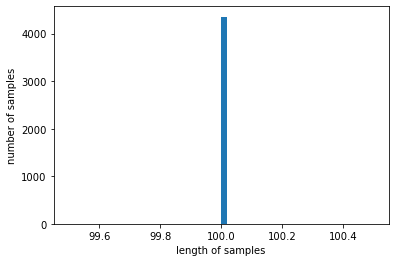

In [231]:
print('리뷰의 최대 길이 :',max(len(l) for l in X_train_mean))
print('리뷰의 평균 길이 :',sum(map(len, X_train_mean))/len(X_train_mean))
plt.hist([len(s) for s in X_train_mean], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

# 모델 구축

In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from konlpy.tag import Okt
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras.layers import Embedding, Dense, LSTM, Bidirectional, Dropout,BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [295]:
def DNN():
    global loaded_model
    # 모델 구조 정의하기
    model = models.Sequential()
    model.add(layers.Dense(128, activation='relu')) 
    model.add(layers.Dense(128, activation='relu')) #ReLU 활성화함수 채택
    model.add(layers.Dense(1, activation='sigmoid'))
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)
    mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
    history = model.fit(X_train, y_train, epochs=100, callbacks=[es, mc], batch_size=32, validation_split=0.2)
    loaded_model = load_model('best_model.h5')
    score = loaded_model.evaluate(X_test, y_test)[1]
    print("테스트 정확도: %.4f" % (score))
    y_pred = loaded_model.predict(X_test)
    predicted = [round(float(pred),0) for pred in y_pred]
    print(classification_report(y_test,predicted))
#     test_result.append(('DNN',score))

In [296]:
DNN()

Epoch 1/100
101/109 [==========================>...] - ETA: 0s - loss: 0.5343 - acc: 0.7280
Epoch 00001: val_acc improved from -inf to 0.75459, saving model to best_model.h5
109/109 [==============================] - 0s 3ms/step - loss: 0.5337 - acc: 0.7296 - val_loss: 0.4819 - val_acc: 0.7546
Epoch 2/100
104/109 [===========================>..] - ETA: 0s - loss: 0.4430 - acc: 0.8017
Epoch 00002: val_acc improved from 0.75459 to 0.77752, saving model to best_model.h5
109/109 [==============================] - 0s 1ms/step - loss: 0.4427 - acc: 0.8020 - val_loss: 0.4619 - val_acc: 0.7775
Epoch 3/100
 84/109 [======================>.......] - ETA: 0s - loss: 0.4197 - acc: 0.8136
Epoch 00003: val_acc did not improve from 0.77752
109/109 [==============================] - 0s 1ms/step - loss: 0.4171 - acc: 0.8137 - val_loss: 0.5117 - val_acc: 0.7592
Epoch 4/100
 95/109 [=========================>....] - ETA: 0s - loss: 0.3939 - acc: 0.8276
Epoch 00004: val_acc improved from 0.77752 to 0.7798

103/109 [===========================>..] - ETA: 0s - loss: 0.0823 - acc: 0.9721
Epoch 00031: val_acc did not improve from 0.80390
109/109 [==============================] - 0s 1ms/step - loss: 0.0805 - acc: 0.9724 - val_loss: 1.0778 - val_acc: 0.7810
Epoch 32/100
 74/109 [===================>..........] - ETA: 0s - loss: 0.0866 - acc: 0.9688
Epoch 00032: val_acc did not improve from 0.80390
109/109 [==============================] - 0s 2ms/step - loss: 0.0797 - acc: 0.9699 - val_loss: 1.2338 - val_acc: 0.7787
Epoch 33/100
 92/109 [========================>.....] - ETA: 0s - loss: 0.0683 - acc: 0.9806
Epoch 00033: val_acc did not improve from 0.80390
109/109 [==============================] - 0s 1ms/step - loss: 0.0678 - acc: 0.9793 - val_loss: 1.1859 - val_acc: 0.7546
Epoch 34/100
 57/109 [==============>...............] - ETA: 0s - loss: 0.0598 - acc: 0.9814
Epoch 00034: val_acc did not improve from 0.80390
109/109 [==============================] - 0s 1ms/step - loss: 0.0706 - acc: 0

# 랜포

In [298]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
def model_evaluation(label, predict):
    cf_matrix = confusion_matrix(label, predict)
    Accuracy = (cf_matrix[0][0] + cf_matrix[1][1]) / sum(sum(cf_matrix))
    Precision = cf_matrix[1][1] / (cf_matrix[1][1] + cf_matrix[0][1])
    Recall = cf_matrix[1][1] / (cf_matrix[1][1] + cf_matrix[1][0])
    Specificity = cf_matrix[0][0] / (cf_matrix[0][0] + cf_matrix[0][1])
    F1_Score = (2 * Recall * Precision) / (Recall + Precision)
    F2_Score = (5 * Recall * Precision) / (Recall + 4*Precision)
    
    print("Accuracy: ", Accuracy)
    print("Precision: ", Precision)
    print("Recall: ", Recall)
    print("Specificity: ", Specificity)
    print("F1-Score: ", F1_Score)
    print("F2-Score: ", F2_Score)
    print("auc score: " , roc_auc_score(label, np.round(predict,0)))


In [268]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
rf = RandomForestClassifier( n_estimators = 100,oob_score=True, n_jobs = -1, random_state = 0)
rf.fit(X_train,y_train)

predicted = rf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)

print(f'모델 자체 정확도: {rf.oob_score_:.3}')
print(f'테스트 정확도: {accuracy:.3}')
print(classification_report(y_test,predicted))

모델 자체 정확도: 0.776
테스트 정확도: 0.778
              precision    recall  f1-score   support

           0       0.76      0.96      0.85       948
           1       0.84      0.45      0.58       505

    accuracy                           0.78      1453
   macro avg       0.80      0.70      0.72      1453
weighted avg       0.79      0.78      0.76      1453



In [309]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.model_selection import StratifiedKFold

#rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
#rf.fit(X_train, y_train)

#최적 파라미터 값 찾기
params = { 'n_estimators' : [10, 100,200],
           'max_depth' : [6, 8, 10],
           'min_samples_leaf' : [3,5 ,7],
           'min_samples_split' : [2,3,6]}

rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
kfold = KFold(n_splits=5, shuffle=True, random_state=0) #업샘플링할때
# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0) #업샘플링 하지 않았을때
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = kfold, n_jobs = -1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)


최적 하이퍼 파라미터:  {'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 200}


NameError: name 'test_x' is not defined

In [310]:

predicted = grid_cv.predict(X_test)
print(confusion_matrix(y_test, predicted))
print(model_evaluation(y_test, predicted))
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))
print('='*40)
print()
print()

[[892  56]
 [267 238]]
Accuracy:  0.7777013076393668
Precision:  0.8095238095238095
Recall:  0.47128712871287126
Specificity:  0.9409282700421941
F1-Score:  0.5957446808510638
F2-Score:  0.5142610198789974
auc score:  0.7061076993775327
None
최고 예측 정확도: 0.7796




# SVM 모델

In [304]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
#최적 파라미터 값 찾기
param_grid = [ { 'C' : [0.1, 1, 10 ], 'kernel': [ 'rbf' ], 'gamma' : [ 1,0.1 ]},
    {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                     ]

def svm_model(train_x, train_y,test_x, test_y,cv):
    print("데이터셋 : ", train_x ," &  cv: " , cv)
    grid_search = GridSearchCV(SVC(),param_grid, cv=cv, return_train_score = True)
    grid_search.fit(train_x, train_y)
    print("best parameters : {}".format(grid_search.best_params_))
    predicted = grid_search.predict(test_x)
    print(confusion_matrix(test_y, predicted))
    print(model_evaluation(test_y, predicted))
    print('최고 예측 정확도: {:.4f}'.format(grid_search.best_score_))
    print('='*40)
    print()
    print()

In [305]:
svm_model(X_train, y_train,X_test, y_test,3)

데이터셋 :  [[-0.04661505  0.16993053  0.27061811 ... -0.09436165  0.14314945
  -0.14541295]
 [-0.07975016  0.136363    0.20714115 ... -0.15305319  0.34772229
  -0.13613091]
 [ 0.08952134  0.29716524  0.17057715 ... -0.07201694  0.23210075
  -0.1223828 ]
 ...
 [-0.27093104  0.17475013  0.17555496 ... -0.16118459  0.38636994
  -0.15391727]
 [ 0.00759386  0.29934341  0.09445645 ... -0.23899582  0.30256429
  -0.05873086]
 [ 0.01223171  0.13627512 -0.03923143 ... -0.15203705  0.11687265
   0.0436728 ]]  &  cv:  3
best parameters : {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
[[849  99]
 [218 287]]
Accuracy:  0.7818306951135582
Precision:  0.7435233160621761
Recall:  0.5683168316831683
Specificity:  0.8955696202531646
F1-Score:  0.6442199775533108
F2-Score:  0.5964256026600167
auc score:  0.7319432259681665
None
최고 예측 정확도: 0.8021




In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.model_selection import StratifiedKFold

#rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
#rf.fit(X_train, y_train)

#최적 파라미터 값 찾기
params = { 'n_estimators' : [10, 100,200],
           'max_depth' : [6, 8, 10],
           'min_samples_leaf' : [3,5 ,7],
           'min_samples_split' : [2,3,6]}

rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
kfold = KFold(n_splits=5, shuffle=True, random_state=0) #업샘플링할때
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0) #업샘플링 하지 않았을때
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = kfold, n_jobs = -1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

In [297]:

params = { 'n_estimators' : [10,20,30,40,100],
            }
rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1, scoring='roc_auc')

grid_cv.fit(X_train, y_train)

print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

pred = grid_cv.predict(X_test)
y_pred.append(pred[0])

NameError: name 'GridSearchCV' is not defined

In [152]:
DNN()

KeyboardInterrupt: 

In [119]:
def DNN():
    # 모델 구조 정의하기
    model = models.Sequential()
    model.add(layers.Dense(128, activation='softmax')) 
    model.add(BatchNormalization())
    model.add(layers.Dense(128, activation='softmax')) #ReLU 활성화함수 채택
    model.add(BatchNormalization())
    model.add(layers.Dense(128, activation='softmax')) #ReLU 활성화함수 채택
    model.add(BatchNormalization())
    model.add(layers.Dense(128, activation='softmax')) #ReLU 활성화함수 채택
    model.add(BatchNormalization())
    model.add(layers.Dense(1, activation='sigmoid'))
#     es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
    mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
    history = model.fit(X_train_mean, y_train, epochs=100, callbacks=[mc], batch_size=32, validation_split=0.2)
    loaded_model = load_model('best_model.h5')
    score = loaded_model.evaluate(X_test_mean, y_test)[1]
    print("테스트 정확도: %.4f" % (score))
#     test_result.append(('DNN',score))

In [120]:
DNN()

Epoch 1/100
108/110 [============================>.] - ETA: 0s - loss: 0.5799 - acc: 0.7023
Epoch 00001: val_acc improved from -inf to 0.66934, saving model to best_model.h5
110/110 [==============================] - 2s 14ms/step - loss: 0.5798 - acc: 0.7025 - val_loss: 0.6347 - val_acc: 0.6693
Epoch 2/100
110/110 [==============================] - ETA: 0s - loss: 0.5006 - acc: 0.7524
Epoch 00002: val_acc did not improve from 0.66934
110/110 [==============================] - 1s 9ms/step - loss: 0.5006 - acc: 0.7524 - val_loss: 0.6393 - val_acc: 0.6693
Epoch 3/100
108/110 [============================>.] - ETA: 0s - loss: 0.4931 - acc: 0.7555
Epoch 00003: val_acc did not improve from 0.66934
110/110 [==============================] - 1s 9ms/step - loss: 0.4920 - acc: 0.7564 - val_loss: 0.6387 - val_acc: 0.6693
Epoch 4/100
106/110 [===========================>..] - ETA: 0s - loss: 0.4970 - acc: 0.7485
Epoch 00004: val_acc did not improve from 0.66934
110/110 [===========================

Epoch 32/100
109/110 [============================>.] - ETA: 0s - loss: 0.3630 - acc: 0.8360
Epoch 00032: val_acc did not improve from 0.69451
110/110 [==============================] - 1s 7ms/step - loss: 0.3627 - acc: 0.8362 - val_loss: 0.9017 - val_acc: 0.6270
Epoch 33/100
107/110 [============================>.] - ETA: 0s - loss: 0.3628 - acc: 0.8350
Epoch 00033: val_acc did not improve from 0.69451
110/110 [==============================] - 1s 7ms/step - loss: 0.3653 - acc: 0.8337 - val_loss: 0.8277 - val_acc: 0.6796
Epoch 34/100
109/110 [============================>.] - ETA: 0s - loss: 0.3620 - acc: 0.8380
Epoch 00034: val_acc did not improve from 0.69451
110/110 [==============================] - 0s 3ms/step - loss: 0.3617 - acc: 0.8382 - val_loss: 0.8482 - val_acc: 0.6545
Epoch 35/100
 95/110 [========================>.....] - ETA: 0s - loss: 0.3584 - acc: 0.8355
Epoch 00035: val_acc did not improve from 0.69451
110/110 [==============================] - 0s 3ms/step - loss: 0.

Epoch 63/100
104/110 [===========================>..] - ETA: 0s - loss: 0.2664 - acc: 0.8846
Epoch 00063: val_acc did not improve from 0.69908
110/110 [==============================] - 0s 3ms/step - loss: 0.2658 - acc: 0.8849 - val_loss: 0.9982 - val_acc: 0.6751
Epoch 64/100
 93/110 [========================>.....] - ETA: 0s - loss: 0.2814 - acc: 0.8753
Epoch 00064: val_acc did not improve from 0.69908
110/110 [==============================] - 0s 3ms/step - loss: 0.2836 - acc: 0.8737 - val_loss: 1.0034 - val_acc: 0.6579
Epoch 65/100
107/110 [============================>.] - ETA: 0s - loss: 0.2532 - acc: 0.8899
Epoch 00065: val_acc did not improve from 0.69908
110/110 [==============================] - 0s 3ms/step - loss: 0.2527 - acc: 0.8904 - val_loss: 1.0408 - val_acc: 0.6533
Epoch 66/100
100/110 [==========================>...] - ETA: 0s - loss: 0.2580 - acc: 0.8834
Epoch 00066: val_acc did not improve from 0.69908
110/110 [==============================] - 0s 3ms/step - loss: 0.

Epoch 94/100
102/110 [==========================>...] - ETA: 0s - loss: 0.1997 - acc: 0.9145
Epoch 00094: val_acc did not improve from 0.69908
110/110 [==============================] - 1s 5ms/step - loss: 0.1991 - acc: 0.9138 - val_loss: 1.2906 - val_acc: 0.6579
Epoch 95/100
 97/110 [=========================>....] - ETA: 0s - loss: 0.1937 - acc: 0.9156
Epoch 00095: val_acc did not improve from 0.69908
110/110 [==============================] - 0s 3ms/step - loss: 0.1911 - acc: 0.9167 - val_loss: 1.3632 - val_acc: 0.6705
Epoch 96/100
 93/110 [========================>.....] - ETA: 0s - loss: 0.1987 - acc: 0.9126
Epoch 00096: val_acc did not improve from 0.69908
110/110 [==============================] - 0s 3ms/step - loss: 0.2049 - acc: 0.9098 - val_loss: 1.2898 - val_acc: 0.6213
Epoch 97/100
107/110 [============================>.] - ETA: 0s - loss: 0.1992 - acc: 0.9133
Epoch 00097: val_acc did not improve from 0.69908
110/110 [==============================] - 0s 3ms/step - loss: 0.

In [135]:
def DNN():
    # 모델 구조 정의하기
    model = models.Sequential()
    model.add(layers.Dense(32, activation='softmax')) 
    model.add(BatchNormalization())
    model.add(layers.Dense(32, activation='softmax')) #ReLU 활성화함수 채택
    model.add(BatchNormalization())
    model.add(layers.Dense(32, activation='softmax')) #ReLU 활성화함수 채택
    model.add(BatchNormalization())
    model.add(layers.Dense(32, activation='softmax')) #ReLU 활성화함수 채택
    model.add(BatchNormalization())
    model.add(layers.Dense(1, activation='sigmoid'))
#     es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
    mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
    history = model.fit(X_train_mean, y_train, epochs=100, callbacks=[mc], batch_size=32, validation_split=0.2)
    loaded_model = load_model('best_model.h5')
    score = loaded_model.evaluate(X_test_mean, y_test)[1]
    print("테스트 정확도: %.4f" % (score))
#     test_result.append(('DNN',score))

In [136]:
DNN()

Epoch 1/100
108/110 [============================>.] - ETA: 0s - loss: 0.5872 - acc: 0.6968
Epoch 00001: val_acc improved from -inf to 0.66934, saving model to best_model.h5
110/110 [==============================] - 0s 4ms/step - loss: 0.5875 - acc: 0.6962 - val_loss: 0.6359 - val_acc: 0.6693
Epoch 2/100
 99/110 [==========================>...] - ETA: 0s - loss: 0.4924 - acc: 0.7560
Epoch 00002: val_acc did not improve from 0.66934
110/110 [==============================] - 0s 2ms/step - loss: 0.4955 - acc: 0.7561 - val_loss: 0.6351 - val_acc: 0.6693
Epoch 3/100
 77/110 [====================>.........] - ETA: 0s - loss: 0.4665 - acc: 0.7776
Epoch 00003: val_acc did not improve from 0.66934
110/110 [==============================] - 0s 2ms/step - loss: 0.4732 - acc: 0.7747 - val_loss: 0.6353 - val_acc: 0.6693
Epoch 4/100
 96/110 [=========================>....] - ETA: 0s - loss: 0.4593 - acc: 0.7832
Epoch 00004: val_acc did not improve from 0.66934
110/110 [============================

Epoch 32/100
 81/110 [=====================>........] - ETA: 0s - loss: 0.2646 - acc: 0.8873
Epoch 00032: val_acc did not improve from 0.69794
110/110 [==============================] - 0s 1ms/step - loss: 0.2640 - acc: 0.8843 - val_loss: 1.0671 - val_acc: 0.6682
Epoch 33/100
 83/110 [=====================>........] - ETA: 0s - loss: 0.2424 - acc: 0.8942
Epoch 00033: val_acc did not improve from 0.69794
110/110 [==============================] - 0s 1ms/step - loss: 0.2577 - acc: 0.8881 - val_loss: 1.0420 - val_acc: 0.6728
Epoch 34/100
 79/110 [====================>.........] - ETA: 0s - loss: 0.2352 - acc: 0.8972
Epoch 00034: val_acc did not improve from 0.69794
110/110 [==============================] - 0s 1ms/step - loss: 0.2412 - acc: 0.8935 - val_loss: 1.1474 - val_acc: 0.6510
Epoch 35/100
 82/110 [=====================>........] - ETA: 0s - loss: 0.2611 - acc: 0.8868
Epoch 00035: val_acc did not improve from 0.69794
110/110 [==============================] - 0s 2ms/step - loss: 0.

 88/110 [=======================>......] - ETA: 0s - loss: 0.1913 - acc: 0.9201
Epoch 00063: val_acc did not improve from 0.69794
110/110 [==============================] - 0s 1ms/step - loss: 0.1907 - acc: 0.9187 - val_loss: 1.3452 - val_acc: 0.6568
Epoch 64/100
 86/110 [======================>.......] - ETA: 0s - loss: 0.1807 - acc: 0.9237
Epoch 00064: val_acc did not improve from 0.69794
110/110 [==============================] - 0s 1ms/step - loss: 0.1805 - acc: 0.9247 - val_loss: 1.3737 - val_acc: 0.6533
Epoch 65/100
 89/110 [=======================>......] - ETA: 0s - loss: 0.1805 - acc: 0.9284
Epoch 00065: val_acc did not improve from 0.69794
110/110 [==============================] - 0s 1ms/step - loss: 0.1880 - acc: 0.9233 - val_loss: 1.3495 - val_acc: 0.6419
Epoch 66/100
 86/110 [======================>.......] - ETA: 0s - loss: 0.1847 - acc: 0.9244
Epoch 00066: val_acc did not improve from 0.69794
110/110 [==============================] - 0s 1ms/step - loss: 0.1848 - acc: 0

 81/110 [=====================>........] - ETA: 0s - loss: 0.1328 - acc: 0.9406
Epoch 00094: val_acc did not improve from 0.69794
110/110 [==============================] - 0s 1ms/step - loss: 0.1329 - acc: 0.9430 - val_loss: 1.6066 - val_acc: 0.6430
Epoch 95/100
110/110 [==============================] - ETA: 0s - loss: 0.1236 - acc: 0.9499
Epoch 00095: val_acc did not improve from 0.69794
110/110 [==============================] - 0s 2ms/step - loss: 0.1236 - acc: 0.9499 - val_loss: 1.6259 - val_acc: 0.6453
Epoch 96/100
109/110 [============================>.] - ETA: 0s - loss: 0.1450 - acc: 0.9464
Epoch 00096: val_acc did not improve from 0.69794
110/110 [==============================] - 0s 2ms/step - loss: 0.1451 - acc: 0.9465 - val_loss: 1.5579 - val_acc: 0.6533
Epoch 97/100
 79/110 [====================>.........] - ETA: 0s - loss: 0.1177 - acc: 0.9525
Epoch 00097: val_acc did not improve from 0.69794
110/110 [==============================] - 0s 1ms/step - loss: 0.1163 - acc: 0

In [149]:
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense

def cnn_1D():
    model = Sequential()    
    model.add(Conv1D(256, 32, padding='valid', activation='relu'))
    model.add(BatchNormalization())
    model.add(GlobalMaxPooling1D())
    model.add(BatchNormalization())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dense(1, activation='sigmoid'))
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
    mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
    print(model.summary)
    history = model.fit(X_train_mean, y_train, epochs=100, callbacks=[mc], batch_size=32, validation_split=0.2)
    loaded_model = load_model('best_model.h5')
    score = loaded_model.evaluate(X_test_mean, y_test)[1]
    print("테스트 정확도: %.4f" % (score))
    test_result.append(('1D-CNN',score))

In [150]:
cnn_1D()

<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001804E70EC10>>
Epoch 1/100


ValueError: in user code:

    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:747 train_step
        y_pred = self(x, training=True)
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:191 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_19 is incompatible with the layer: : expected min_ndim=3, found ndim=2. Full shape received: [None, 100]


In [73]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(100,))) 
model.add(Dropout(0.5))
model.add(layers.Dense(128, activation='relu', input_shape=(100,))) 
model.add(Dropout(0.5))
model.add(layers.Dense(64, activation='relu')) #ReLU 활성화함수 채택
model.add(layers.Dense(3, activation='softmax'))


In [74]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_scaled, y_train, epochs=100, callbacks=[mc], batch_size=64, validation_split=0.2)

# loaded_model = load_model('best_model.h5')
print("테스트 정확도: %.4f" % (model.evaluate(x_test, y_test)[1]))

Epoch 1/100
54/75 [====================>.........] - ETA: 0s - loss: 1.0596 - acc: 0.4442
Epoch 00001: val_acc improved from -inf to 0.54177, saving model to best_model.h5
75/75 [==============================] - 0s 4ms/step - loss: 1.0494 - acc: 0.4511 - val_loss: 0.9663 - val_acc: 0.5418
Epoch 2/100
74/75 [============================>.] - ETA: 0s - loss: 0.9765 - acc: 0.5150
Epoch 00002: val_acc improved from 0.54177 to 0.55359, saving model to best_model.h5
75/75 [==============================] - 0s 3ms/step - loss: 0.9765 - acc: 0.5149 - val_loss: 0.9294 - val_acc: 0.5536
Epoch 3/100
71/75 [===========================>..] - ETA: 0s - loss: 0.9282 - acc: 0.5447
Epoch 00003: val_acc improved from 0.55359 to 0.56540, saving model to best_model.h5
75/75 [==============================] - 0s 3ms/step - loss: 0.9293 - acc: 0.5453 - val_loss: 0.9152 - val_acc: 0.5654
Epoch 4/100
71/75 [===========================>..] - ETA: 0s - loss: 0.8873 - acc: 0.5801
Epoch 00004: val_acc did not im

Epoch 32/100
55/75 [=====================>........] - ETA: 0s - loss: 0.6692 - acc: 0.6935
Epoch 00032: val_acc did not improve from 0.58734
75/75 [==============================] - 0s 2ms/step - loss: 0.6683 - acc: 0.6971 - val_loss: 0.9485 - val_acc: 0.5688
Epoch 33/100
57/75 [=====================>........] - ETA: 0s - loss: 0.6470 - acc: 0.6987
Epoch 00033: val_acc did not improve from 0.58734
75/75 [==============================] - 0s 2ms/step - loss: 0.6532 - acc: 0.6994 - val_loss: 0.9582 - val_acc: 0.5519
Epoch 34/100
74/75 [============================>.] - ETA: 0s - loss: 0.6607 - acc: 0.7025
Epoch 00034: val_acc did not improve from 0.58734
75/75 [==============================] - 0s 3ms/step - loss: 0.6611 - acc: 0.7023 - val_loss: 0.9546 - val_acc: 0.5662
Epoch 35/100
50/75 [===================>..........] - ETA: 0s - loss: 0.6298 - acc: 0.7284
Epoch 00035: val_acc did not improve from 0.58734
75/75 [==============================] - 0s 2ms/step - loss: 0.6442 - acc: 0.71

Epoch 64/100
48/75 [==================>...........] - ETA: 0s - loss: 0.4867 - acc: 0.7891
Epoch 00064: val_acc did not improve from 0.58734
75/75 [==============================] - 0s 2ms/step - loss: 0.4972 - acc: 0.7874 - val_loss: 1.0874 - val_acc: 0.5570
Epoch 65/100
74/75 [============================>.] - ETA: 0s - loss: 0.4957 - acc: 0.7941
Epoch 00065: val_acc did not improve from 0.58734
75/75 [==============================] - 0s 2ms/step - loss: 0.4956 - acc: 0.7942 - val_loss: 1.1008 - val_acc: 0.5561
Epoch 66/100
58/75 [======================>.......] - ETA: 0s - loss: 0.4795 - acc: 0.8017
Epoch 00066: val_acc did not improve from 0.58734
75/75 [==============================] - 0s 2ms/step - loss: 0.4879 - acc: 0.7954 - val_loss: 1.0969 - val_acc: 0.5451
Epoch 67/100
55/75 [=====================>........] - ETA: 0s - loss: 0.4694 - acc: 0.8114
Epoch 00067: val_acc did not improve from 0.58734
75/75 [==============================] - 0s 2ms/step - loss: 0.4769 - acc: 0.80

Epoch 96/100
57/75 [=====================>........] - ETA: 0s - loss: 0.3730 - acc: 0.8575
Epoch 00096: val_acc did not improve from 0.58734
75/75 [==============================] - 0s 2ms/step - loss: 0.3798 - acc: 0.8535 - val_loss: 1.2857 - val_acc: 0.5401
Epoch 97/100
55/75 [=====================>........] - ETA: 0s - loss: 0.3674 - acc: 0.8483
Epoch 00097: val_acc did not improve from 0.58734
75/75 [==============================] - 0s 2ms/step - loss: 0.3703 - acc: 0.8505 - val_loss: 1.2977 - val_acc: 0.5443
Epoch 98/100
55/75 [=====================>........] - ETA: 0s - loss: 0.3621 - acc: 0.8605
Epoch 00098: val_acc did not improve from 0.58734
75/75 [==============================] - 0s 2ms/step - loss: 0.3682 - acc: 0.8539 - val_loss: 1.3011 - val_acc: 0.5536
Epoch 99/100
56/75 [=====================>........] - ETA: 0s - loss: 0.3744 - acc: 0.8538
Epoch 00099: val_acc did not improve from 0.58734
75/75 [==============================] - 0s 2ms/step - loss: 0.3762 - acc: 0.85

NameError: name 'x_test' is not defined

In [67]:
len(X_train_mean)

5922

In [68]:
from tensorflow.keras.layers import Dense, LSTM,Bidirectional ,Embedding, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras import metrics
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
model = Sequential([
    Embedding(len(X_train_mean), 200, input_length=100),
    Bidirectional(LSTM(128, return_sequences=True)),
    Bidirectional(LSTM(128)),
    Dropout(0.25),
    Dense(32,activation='relu'),
    Dense(3,activation='softmax'),
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 200)          1184400   
_________________________________________________________________
bidirectional_4 (Bidirection (None, 100, 256)          336896    
_________________________________________________________________
bidirectional_5 (Bidirection (None, 256)               394240    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 32)                8224      
_________________________________________________________________
dense_12 (Dense)             (None, 3)                 99        
Total params: 1,923,859
Trainable params: 1,923,859
Non-trainable params: 0
____________________________________________

In [69]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train_mean, y_train, epochs=100, callbacks=[mc], batch_size=64, validation_split=0.2)

loaded_model = load_model('best_model.h5')
print("테스트 정확도: %.4f" % (loaded_model.evaluate(x_test, y_test)[1]))

Epoch 1/100
 1/75 [..............................] - ETA: 0s - loss: 1.0983 - acc: 0.3125

InvalidArgumentError:  indices[46,40] = -1 is not in [0, 5922)
	 [[node sequential_5/embedding_2/embedding_lookup (defined at <ipython-input-69-c40fdff1707b>:4) ]] [Op:__inference_train_function_198155]

Errors may have originated from an input operation.
Input Source operations connected to node sequential_5/embedding_2/embedding_lookup:
 sequential_5/embedding_2/embedding_lookup/194011 (defined at C:\Users\rlagy\anaconda3\lib\contextlib.py:113)

Function call stack:
train_function


In [103]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [ ]:
model = Sequential() 
# Sequeatial Model 
model.add(LSTM(20, input_shape=(12, 1))) # (timestep, feature) 
model.add(Dense(1)) 
# output = 1

model.compile(loss='mean_squared_error', optimizer='adam')



In [112]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, GlobalMaxPool1D, Dropout
model = Sequential()

model.add(Embedding(input_dim=vocab_len, output_dim=64))
model.add(LSTM(32, return_sequences=True))
model.add(GlobalMaxPool1D())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_19 (Embedding)     (None, None, 64)          5600448   
_________________________________________________________________
lstm_45 (LSTM)               (None, None, 32)          12416     
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 32)                0         
_________________________________________________________________
dense_34 (Dense)             (None, 16)                528       
_________________________________________________________________
dropout_15 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_35 (Dense)             (None, 3)                 51        
Total params: 5,613,443
Trainable params: 5,613,443
Non-trainable params: 0
___________________________________________

In [114]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train_mean, y_train, epochs=100, callbacks=[mc], batch_size=64, validation_split=0.2)

loaded_model = load_model('best_model.h5')
print("테스트 정확도: %.4f" % (loaded_model.evaluate(x_test, y_test)[1]))

Epoch 1/100
2/2 [==============================] - ETA: 0s - loss: 1.0979 - acc: 0.4125
Epoch 00001: val_acc improved from -inf to 0.45000, saving model to best_model.h5
2/2 [==============================] - 37s 18s/step - loss: 1.0979 - acc: 0.4125 - val_loss: 1.0974 - val_acc: 0.4500
Epoch 2/100
2/2 [==============================] - ETA: 0s - loss: 1.0976 - acc: 0.4250
Epoch 00002: val_acc did not improve from 0.45000
2/2 [==============================] - 7s 3s/step - loss: 1.0976 - acc: 0.4250 - val_loss: 1.0960 - val_acc: 0.4500
Epoch 3/100
2/2 [==============================] - ETA: 0s - loss: 1.0970 - acc: 0.4000
Epoch 00003: val_acc did not improve from 0.45000
2/2 [==============================] - 7s 3s/step - loss: 1.0970 - acc: 0.4000 - val_loss: 1.0950 - val_acc: 0.4500
Epoch 4/100
2/2 [==============================] - ETA: 0s - loss: 1.0963 - acc: 0.4000
Epoch 00004: val_acc did not improve from 0.45000
2/2 [==============================] - 7s 3s/step - loss: 1.0963 -

2/2 [==============================] - ETA: 0s - loss: 1.0893 - acc: 0.4000
Epoch 00033: val_acc did not improve from 0.45000
2/2 [==============================] - 7s 3s/step - loss: 1.0893 - acc: 0.4000 - val_loss: 1.0773 - val_acc: 0.4500
Epoch 34/100
2/2 [==============================] - ETA: 0s - loss: 1.0905 - acc: 0.4000
Epoch 00034: val_acc did not improve from 0.45000
2/2 [==============================] - 7s 3s/step - loss: 1.0905 - acc: 0.4000 - val_loss: 1.0770 - val_acc: 0.4500
Epoch 35/100
2/2 [==============================] - ETA: 0s - loss: 1.0889 - acc: 0.4000
Epoch 00035: val_acc did not improve from 0.45000
2/2 [==============================] - 7s 3s/step - loss: 1.0889 - acc: 0.4000 - val_loss: 1.0766 - val_acc: 0.4500
Epoch 36/100
2/2 [==============================] - ETA: 0s - loss: 1.0882 - acc: 0.4000
Epoch 00036: val_acc did not improve from 0.45000
2/2 [==============================] - 7s 3s/step - loss: 1.0882 - acc: 0.4000 - val_loss: 1.0761 - val_acc: 

2/2 [==============================] - ETA: 0s - loss: 1.0911 - acc: 0.4000
Epoch 00097: val_acc did not improve from 0.45000
2/2 [==============================] - 7s 3s/step - loss: 1.0911 - acc: 0.4000 - val_loss: 1.0775 - val_acc: 0.4500
Epoch 98/100
2/2 [==============================] - ETA: 0s - loss: 1.0905 - acc: 0.4000
Epoch 00098: val_acc did not improve from 0.45000
2/2 [==============================] - 7s 3s/step - loss: 1.0905 - acc: 0.4000 - val_loss: 1.0775 - val_acc: 0.4500
Epoch 99/100
2/2 [==============================] - ETA: 0s - loss: 1.0885 - acc: 0.4000
Epoch 00099: val_acc did not improve from 0.45000
2/2 [==============================] - 7s 3s/step - loss: 1.0885 - acc: 0.4000 - val_loss: 1.0774 - val_acc: 0.4500
Epoch 100/100
2/2 [==============================] - ETA: 0s - loss: 1.0922 - acc: 0.4000
Epoch 00100: val_acc did not improve from 0.45000
2/2 [==============================] - 7s 3s/step - loss: 1.0922 - acc: 0.4000 - val_loss: 1.0774 - val_acc:

NameError: name 'x_test' is not defined

### 1-D CNN

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

model = Sequential()
model.add(Embedding(100, 256))
model.add(Dropout(0.3))
model.add(Conv1D(256, 3, padding='valid', activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

In [41]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [42]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train_mean, y_train, epochs=100, callbacks=[mc], batch_size=64, validation_split=0.2)

Epoch 1/100


ValueError: in user code:

    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:747 train_step
        y_pred = self(x, training=True)
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:372 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\keras\engine\functional.py:385 call
        return self._run_internal_graph(
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\keras\engine\functional.py:508 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\keras\layers\convolutional.py:247 call
        outputs = self._convolution_op(inputs, self.kernel)
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\ops\nn_ops.py:1010 convolution_v2
        return convolution_internal(
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\ops\nn_ops.py:1140 convolution_internal
        return op(
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\util\deprecation.py:574 new_func
        return func(*args, **kwargs)
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\util\deprecation.py:574 new_func
        return func(*args, **kwargs)
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\ops\nn_ops.py:1880 conv1d
        result = gen_nn_ops.conv2d(
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py:975 conv2d
        _, _, _op, _outputs = _op_def_library._apply_op_helper(
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py:742 _apply_op_helper
        op = g._create_op_internal(op_type_name, inputs, dtypes=None,
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\framework\func_graph.py:591 _create_op_internal
        return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\framework\ops.py:3477 _create_op_internal
        ret = Operation(
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\framework\ops.py:1974 __init__
        self._c_op = _create_c_op(self._graph, node_def, inputs,
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\framework\ops.py:1815 _create_c_op
        raise ValueError(str(e))

    ValueError: Negative dimension size caused by subtracting 3 from 1 for '{{node sequential_2/conv1d_1/conv1d}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](sequential_2/conv1d_1/conv1d/ExpandDims, sequential_2/conv1d_1/conv1d/ExpandDims_1)' with input shapes: [?,1,1,256], [1,3,256,256].


In [124]:
loaded_model = load_model('best_model.h5')
print("테스트 정확도: %.4f" % (loaded_model.evaluate(X_test_mean, y_test)[1]))

ValueError: Data cardinality is ambiguous:
  x sizes: 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100
  y sizes: 1974
Please provide data which shares the same first dimension.

In [106]:
preds = loaded_model.predict(X_test)
preds

array([[0.39774117, 0.4180528 , 0.18420602],
       [0.93720895, 0.05255724, 0.01023376],
       [0.53255975, 0.3266842 , 0.14075604],
       ...,
       [0.27636996, 0.466064  , 0.2575661 ],
       [0.2051393 , 0.4949639 , 0.29989678],
       [0.39454758, 0.3854387 , 0.22001368]], dtype=float32)

# 모델 평가 참고 

- https://ayoteralab.tistory.com/entry/Iris-dataset-classification-with-Keras?category=873956

In [29]:
plt.plot(history.history['val_acc'])
plt.plot(history.history['val_loss'])
plt.show()

NameError: name 'history' is not defined

NameError: name 'dataset' is not defined

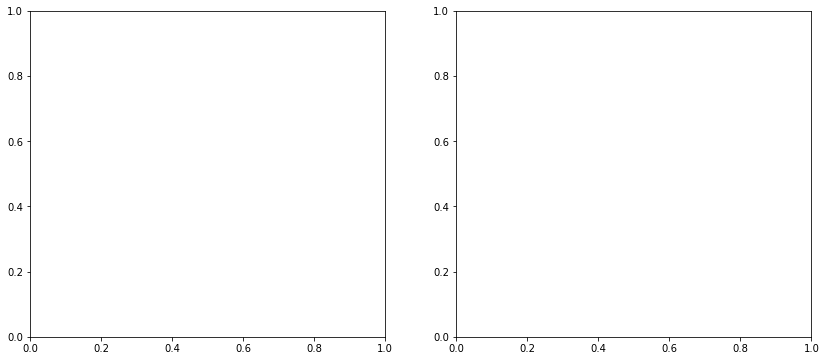

In [108]:
f, ax = plt.subplots(1, 2, figsize=(14,6))
ax[0].scatter(dataset.data[:,0], dataset.data[:,1], c=dataset.target)
ax[0].set_title('scatter with Sepal')
ax[1].scatter(dataset.data[:,2], dataset.data[:,3], c=dataset.target)
ax[1].set_title('scatter with Petal')
plt.show()